Car_Name: Name of the car

Year: Year of manufacture

Selling_Price: Price at which the car is being sold

Present_Price: Current market price of the car

Kms_Driven: Total kilometers driven

Fuel_Type: Type of fuel the car uses (e.g., Petrol, Diesel)

Seller_Type: Type of seller (e.g., Dealer, Individual)

Transmission: Type of transmission (e.g., Manual, Automatic)

Owner: Number of previous owners

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold


In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### Data Cleaning

In [4]:
# Check missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Understand the data

In [5]:
data['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [6]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [8]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [9]:
# Drop name
data.drop(labels='Car_Name', axis=1, inplace = True)

# Rename
data.rename(columns = {'Owner':'Past_Owners'}, inplace=True)

### Feature Engineering

In [10]:
data['Year'].max()

2018

The maximum year of the car is 2018. So I assume we are in 2019 to predict the car price.

In [11]:
# Create car age
data['Car_Age'] = data['Year'].max() - data['Year']


In [12]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [13]:
data = pd.get_dummies(data=data, drop_first=True)

In [14]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,4,False,True,False,True
1,2013,4.75,9.54,43000,0,5,True,False,False,True
2,2017,7.25,9.85,6900,0,1,False,True,False,True
3,2011,2.85,4.15,5200,0,7,False,True,False,True
4,2014,4.60,6.87,42450,0,4,True,False,False,True


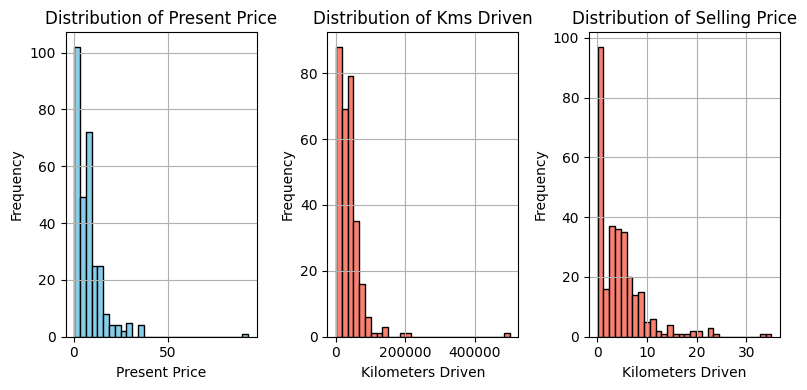

In [15]:
# Check distribution
plt.figure(figsize=(8, 4))

# Histogram for Present_Price
plt.subplot(1, 3, 1) 
data['Present_Price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Present Price')
plt.xlabel('Present Price')
plt.ylabel('Frequency')

# Histogram for Kms_Driven
plt.subplot(1, 3, 2)  
data['Kms_Driven'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Kms Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# Histogram for Kms_Driven
plt.subplot(1, 3, 3) 
data['Selling_Price'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The data are right-skewed!

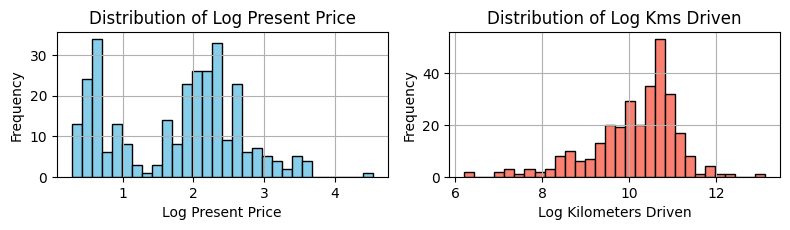

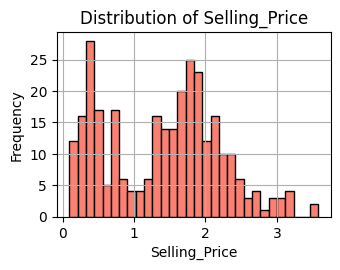

In [16]:
data['Log_Present_Price'] = np.log1p(data['Present_Price'])
data['Log_Kms_Driven'] = np.log1p(data['Kms_Driven'])
data['Log_Selling_Price'] = np.log1p(data['Selling_Price'])

plt.figure(figsize=(8, 4))

# Histogram for Log_Present_Price
plt.subplot(2, 2, 1)
data['Log_Present_Price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Present Price')
plt.xlabel('Log Present Price')
plt.ylabel('Frequency')

# Histogram for Log_Kms_Driven
plt.subplot(2, 2, 2)
data['Log_Kms_Driven'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Log Kms Driven')
plt.xlabel('Log Kilometers Driven')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram for Selling price
plt.subplot(2, 2, 3)
data['Log_Selling_Price'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Selling_Price')
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Log_Present_Price,Log_Kms_Driven,Log_Selling_Price
0,2014,3.35,5.59,27000,0,4,False,True,False,True,1.885553,10.203629,1.470176
1,2013,4.75,9.54,43000,0,5,True,False,False,True,2.355178,10.668979,1.749200
2,2017,7.25,9.85,6900,0,1,False,True,False,True,2.384165,8.839422,2.110213
3,2011,2.85,4.15,5200,0,7,False,True,False,True,1.638997,8.556606,1.348073
4,2014,4.60,6.87,42450,0,4,True,False,False,True,2.063058,10.656106,1.722767


_____

### EDA

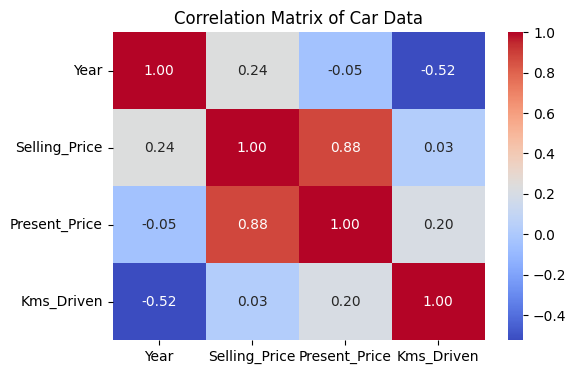

In [18]:
# Correlation
num_data =  data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']]
corr_matrix = num_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Data')
plt.show()

This result is expected. The selling and present price has a strong positive relationship.

In [19]:
num_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


________

### Regression model

In [20]:
data.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Log_Present_Price,Log_Kms_Driven,Log_Selling_Price
0,2014,3.35,5.59,27000,0,4,False,True,False,True,1.885553,10.203629,1.470176


In [21]:
X = data.drop(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Log_Selling_Price'], axis=1)
y = data['Log_Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)  

# Calculating MSE and R² for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculating MSE and R² for test data
test_mse = mean_squared_error(y_test, y_test_pred)  
test_r2 = r2_score(y_test, y_test_pred)           

# Printing results
print(f"Training Data - Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Training Data - R² Score: {train_r2:.2f}")
print(f"Test Data - Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Data - R² Score: {test_r2:.2f}")

Training Data - Mean Squared Error (MSE): 0.02
Training Data - R² Score: 0.97
Test Data - Mean Squared Error (MSE): 0.03
Test Data - R² Score: 0.95


In [27]:
# Apply cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

kf = KFold(n_splits=10, shuffle=True, random_state=42)


cv_mse_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=kf)
cv_r2_scores = cross_val_score(pipeline, X, y, scoring='r2', cv=kf)

# Calculate and print the average MSE and R² scores from cross-validation
print(f"Cross-Validated Mean Squared Error (MSE): {np.mean(-cv_mse_scores):.2f}")
print(f"Cross-Validated R² Score: {np.mean(cv_r2_scores):.2f}")

Cross-Validated Mean Squared Error (MSE): 0.02
Cross-Validated R² Score: 0.96
